<a href="https://colab.research.google.com/github/RAFASOLIS/DevopsCaso1/blob/master/Copy_of_DataFrames_y_Data_pipelines_en_Spark_11Marzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataframes y Data pipelines en Spark**
### **Entornos Big Data y Cloud.**

**Autor**: 

*Por* **Juan Bautista Tomás Gabarrón**.

**Alumno**:  *Rafael Solís López*.



**Recordatorio: Introducción a NoteBook**


“Google Colab” es una herramienta para escribir y ejecutar código Python en la
nube de Google. También es posible incluir texto enriquecido, “links” e
imágenes. En caso de necesitar altas prestaciones de cómputo, el entorno
permite configurar algunas propiedades del equipo sobre el que se ejecuta el
código. En definitiva, el uso de “Google Colab” permite disponer de un entorno para llevar a cabo tareas que serían difíciles de realizar en un equipo personal. Por otro lado, siguiendo la idea de “Drive”, “Google Colab” brinda la opción de compartir los códigos realizados lo que es ideal para trabajos en equipo.

Este tutorial es una guía que comprende varias etapas, esto es, desde la carga de un conjunto de datos hasta el análisis descriptivo de su contenido. Como verás, este cuaderno permite ejecutar celdas precodificadas y ver los resultados directamente sobre la misma celda. Es importante tener en cuenta que las celdas han de ejecutarse consecutivamente, ya que en caso de saltar alguna el programa podría lanzar un error.

*IMPORTANTE*

Es obligatorio abrir el cuaderno haciendo click en la opción "Abrir en modo de ensayo" (draft mode), arriba a la izquierda, en el menú Archivo. De lo contrario, no será posible ejecutar el contenido. 

Por otro lado, si al ejecutar aparece el siguiente mensaje: "Advertencia: Este cuaderno no lo ha creado Google.", no has de preocuparte, es normal. Tan solo hay que pulsar en la opción "Ejecutar de todos modos".

*POR ÚLTIMO*

Para ejecutar cada celda tan solo hay que hacer click sobre el botón de play de cada una. Si vemos hastags (#), se corresponden con comentarios que no van a tener influencia en la ejecución del script. También se puede pinchar sobre cada celda y hacer "ctrl+enter" (cmd+enter en Mac) desde el teclado.

Al ejecutar la celda, verás la salida debajo, incluyendo los posibles errores (si los hubiera) así como las impresiones por pantalla realizadas por el código en la misma celda.

## **ÍNDICE**


1. Primeros pasos. 

2. Preparación de DataFrames para SparK ML. 
  
3. Pipelines en Spark.

4. Pipelines con Machine Learning.

5. Métricas de rendimiento para la evaluación de los modelos de aprendizaje supervisado.

6. Validación de modelos.

*NOTA*: en este tutorial vamos a entender los fundamentas de Spark:MLlib para resolver problemas de Machine Learning utilizando MLlib de Spark. Vamos a aprender a preparar los datos de cara al entrenamiento del modelo, así como configurar los pipelines para sacarle el mayor partido al flujo de procesamiento y estudiaremos finalmente cómo usar Spark algunas funciones para validar los modelos entrenados.

##**1. PRIMEROS PASOS**

¿Qué es MLlib? MLlib o Spark MLlib es la librería de Machine Learning (ML) de Apache Spark. El framework de computación distribuida que incorpora esta librería permite hacer uso de una serie de algoritmos de Machine Learning.

Lo interesante de todo esto, es que los algoritmos de Machine Learning que están implementados dentro de MLlib pueden ser escalados y paralelizados, aprovechando toda la base de Spark.

Dentro de MLlib podemos encontrar dos APIs:

*   La API principal o Spark ML, basada en DataFrames, que se encuentra en el paquete ml 
*   Y la API original o Spark MLlib, que hace uso de RDDs y esta dentro del paquete mllib (está en modo mantenimiento y es posible que desaparezca en futuras versiones de Spark).

El cambio de pasar de API basada en RDDs a otra basada en DataFrames, se debe a que, como hemos visto, éstos últimos son más rápidos y fáciles de manejar.

En MLlib contamos con las siguientes herramientas:

*   **Algoritmos de ML**: son el core de MLlib. Están incluidos los algoritmos de machine learning más comunes: Clasificadores, Regresores, Clustering y Filtros Colaborativos.
*   **Featurization**: herramienta para extraer, seleccionar y transformar variables.
*   **Pipelines**: otra herramienta para construir, evaluar y optimizar las pipelines de ML.
*   **Persistence**: para guardar y cargar algoritmos, modelos y pipelines.
*   **Utilities**: utilidades de álgebra lineal, estadística y manejo de datos.

Con este cuaderno (o notebook) vamos a trabajar con Spark en Google Colaboratory, por lo que los primeros pasos son siempre los mismos (instalación junto con Hadoop, paquetes pyspark y findspark, importación de variables de entorno y generación de sesión Spark), como se muestra debajo. Para cualquier otro proyecto que decidas emprender utilizando Spark junto con MLlib puedes directamente copiar y pegar la siguiente celda.

In [1]:
# Instalamos Apache Spark con Hadoop
!wget -q https://dlcdn.apache.org/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz
!tar xf spark-3.2.3-bin-hadoop3.2.tgz


# Utilizamos pip para instalar los paquetes de Python para trabajar con Spark
!pip install findspark # FindSpark
!pip install pyspark   # Spark

#Inicializamos las variables de entorno con sus valores correspondientes
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/default-java"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"


#Inicializamos las variables de entorno con sus valores correspondientes
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/default-java" 
os.environ["SPARK_HOME"] = "/content/spark-3.2.2-bin-hadoop2.7"

#Indicamos a PySpark donde está Spark (variable de entorno)
import findspark
findspark.init("spark-3.2.3-bin-hadoop3.2")#SPARK_HOME

#Creamos una sesión de Spark para poder comenzar
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Ejemplo Machine Learning PySpark") \
    .config("spark.sql.execution.arrow.enabled", "true") \
    .getOrCreate()

    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 41 kB/s 
     |████████████████████████████████| 199 kB 57.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=52142f32c88ceb21c1e0bb8bce7fcd4d5b902875fac65a97eb6e22fa0019b233
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


Como hemos podido ver a lo largo del curso, un proyecto de Ciencia de Datos normalmente involucra las siguientes fases: preprocesar los datos, seleccionar las variables de entrada, el entrenamiento del modelo y la correspondiente evaluación de los resultados. A todo esto lo denominamos el **ciclo de vida** de la Ciencia de Datos. Lo que vamos a ver en este tutorial es cómo construir dicho ciclo de vida mediante Apache Spark. 

##**2. PREPARACIÓN DE DATAFRAMES PARA SPARK MLLIB.**

Con el fin de trabajar con los algoritmos de Machine Learning de Spark, primero hemos de preparar los datos para que puedan ser procesados después. IMPORTANTE: los algoritmos de Machine Learning de Spark ML, trabajan sólo con datos en formato numérico, con lo cual, es necesario convertirlos a formato numérico. Es decir, cualquier variable de tigo categórico deberá tener su contrapartida numérica.

A continuación podemos ver algunos métodos que se pueden usar para transformar variables:

*  [`Vector Assembler`](http://spark.apache.org/docs/latest/ml-features.html#vectorassembler): este método permite combinar una conjunto de columnas en una sola columna (vector). Esto es debido a que los algoritmos de Machine Learning aceptan un DataFrame donde las variables de entrada están en una sola lista o array, en contraposición a varias columnas. Pasaremos de tener varias columnas de entrada y una de salida, a una sola columna de entrada (con todos los valores agrupados de las columnas) y una de salida (que es lo que debe dar a la salida el modelo, para todoas esas entradas).

* [`StringIndexer`](http://spark.apache.org/docs/latest/ml-features.html#stringindexer): este método asigna un número entero a cada posible categoría, dando el valor cero a la categoría que más veces aparece en el dataset, 1 a la siguiente y así sucesivamente. Para ello, hay que seguir dos pasos: 1) tenemos que indicarle la columna que queremos indexar y 2) indicar el nombre de la columna de salida. En los metadatos del modelo se almacena el esquema usado para la conversión en caso de que deseemos deshacer la operación. Para ello, podemos usar [`IndexToString()`](http://spark.apache.org/docs/latest/ml-features.html#indextostring).

* [`OneHotEncoder`](http://spark.apache.org/docs/latest/ml-features.html#onehotencoder): este método asigna una característica categórica, representada como un índice de etiqueta, a un vector binario con un solo valor, como máximo, que indica la presencia de un valor de característica específico entre el conjunto de todos los valores de características. Esta codificación permite a los algoritmos que esperan características continuas, como la regresión logística, utilizar características categóricas. Para los datos de entrada de tipo cadena, es habitual codificar las características categóricas utilizando primero [`StringIndexer`](http://spark.apache.org/docs/latest/ml-features.html#stringindexer).

  Estas operaciones normalmente tienen lugar al final de la etapa de preprocesamiento de los datos, justo antes de pasarle los datos de entrenamiento al método de Machine Learning. 

Para ilustrar los distintos ejemplos, vamos a trabajar con un problema de  aprendizaje supervisado basado en clasificar un paciente de Hospital como que va a fallecer (1) o no (0) e función de las características de su diagnóstico al ingresar. En primer lugar, nos descargaremos los datos para trabajar. Posteriormente, indexaremos las variables de entrada que se encuentran en formato *string*, y después uniremos las variables de entrada en una lista en una nueva columna, usando para ello `vectorAssembler'. Finalmente, mostramos sólo estas dos columnas generadas, una con la variable de salida en formato numérico y otra con las variables de entrada agrupadas.


In [2]:
#Nos descargamos los ficheros de datos en Google Colaboratory 
!gdown --id '1xnz8qqmzC6h-B0Z0AzRI2RxRMvcwthbS' -O input_X.csv
!gdown --id '1WXIYAWovVloWkxB-zuMSTY2ejpaz4-Hd' -O output_Y.csv

#Vamos a mostrar la cabecera de los ficheros y dos filas, para comprobar
#que se han bajado correctamente.
!head -3 input_X.csv
!head -3 output_Y.csv

#Leemos el fichero con las variables de entrada
dfX = spark.read.csv('input_X.csv',inferSchema=True, header=True, sep=';')
#Leemos el fichero con la variable de salida
dfY = spark.read.csv('output_Y.csv',inferSchema=True, header=True, sep=';')

#Unimos los dos DataFrame
#df=dfX.join(dfY, dfX._c0 == dfY._c0).drop('_c0')
df=dfX.join(dfY).drop('encounter_id', 'patient_id', '_c1')

#Eliminamos la columna que indica el número de instancia
dfX=dfX.drop('encounter_id', 'patient_id', '_c1')
dfY=dfY.drop('encounter_id', 'patient_id', '_c1')

#Preprocesamos los datos para ser utilizados en un algoritmo de ML
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder
from pyspark.sql.functions import col

from pyspark.ml import Pipeline

#Indexamos todas las variables de entrada que tienen algún string
indexada = StringIndexer(inputCol="ethnicity", outputCol="ethnicity_index").fit(df).transform(df)
indexada2 = StringIndexer(inputCol="gender", outputCol="gender_index").fit(indexada).transform(indexada)
indexada3 = StringIndexer(inputCol="icu_admit_source", outputCol="icu_admit_source_index").fit(indexada2).transform(indexada2)
indexada4 = StringIndexer(inputCol="icu_stay_type", outputCol="icu_stay_type_index").fit(indexada3).transform(indexada3)
indexada5 = StringIndexer(inputCol="icu_type", outputCol="icu_type_index").fit(indexada4).transform(indexada4)
indexada6 = StringIndexer(inputCol="apache_3j_bodysystem", outputCol="apache_3j_bodysystem_index").fit(indexada5).transform(indexada5)
indexada7 = StringIndexer(inputCol="apache_2_bodysystem", outputCol="apache_2_bodysystem_index").fit(indexada6).transform(indexada6)

#Borramos columnas originales
indexada8 = indexada7.drop("ethnicity", "gender", "icu_admit_source", "icu_stay_type", "icu_type", "apache_3j_bodysystem", "apache_2_bodysystem")
dfOut = indexada8.withColumnRenamed("ethnicity_index", "ethnicity")\
              .withColumnRenamed("gender_index", "gender")\
              .withColumnRenamed("icu_admit_source_index", "icu_admit_source")\
              .withColumnRenamed("icu_stay_type_index", "icu_stay_type")\
              .withColumnRenamed("icu_type_index", "icu_type")\
              .withColumnRenamed("apache_3j_bodysystem_index", "apache_3j_bodysystem")\
              .withColumnRenamed("apache_2_bodysystem_index", "apache_2_bodysystem")

dfOut.show(15)

#Unimos las variables de entrada con VectorAssembler
assembler = VectorAssembler(inputCols=dfX.columns,outputCol="atributos")
datos = assembler.transform(dfOut)
datos.select('atributos','hospital_death').show(5)


/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xnz8qqmzC6h-B0Z0AzRI2RxRMvcwthbS
To: /content/input_X.csv
100% 170k/170k [00:00<00:00, 82.7MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WXIYAWovVloWkxB-zuMSTY2ejpaz4-Hd
To: /content/output_Y.csv
100% 1.52k/1.52k [00:00<00:00, 1.91MB/s]
encounter_id;patient_id;hospital_id;age;bmi;elective_surgery;ethnicity;gender;height;icu_admit_source;icu_id;icu_stay_type;icu_type;pre_icu_los_days;weight;apache_2_diagnosis;apache_3j_diagnosis;apache_post_operative;arf_apache;gcs_eyes_apache;gcs_motor_apache;gcs_un

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**3. PIPELINES EN SPARK**

Todo proyecto de Ciencia de Datos suele implicar el preprocesado de los datos, la selección de variables de entrada, entrenamiento de un modelo y análisis de los resultados. Por estos motivos, tenemos que realizar una serie de transformaciones de los datos de forma secuencial: gracias a los [pipelines](https://spark.apache.org/docs/latest/ml-pipeline.html
 ) se nos hace más cómodo combinar diferentes algoritmos en un sólo flujo de trabajo. Para usar pipelines es necesario conocer algunos conceptos importantes:

* DataFrame: La estructura de datos con la que vamos a trabajar y que ya deberíamos conocer. Para el que no la conozca, un DataFrame es lo más parecido a una tabla Excel en Spark.

* [Transformadores](http://spark.apache.org/docs/latest/ml-features.html): Un Transformador es un algoritmo o proceso que puede transformar un DataFrame en otro DataFrame. Por ejemplo, en la sección anterior hemos visto varias transformaciones para las variables categóricas cuando hemos pasado de strings a numéricos. Otro caso de uso sería un modelo de Machine Learning que transforma un DataFrame con sólo variables de entrada en predicciones de la variable de salida. Básicamente, un Transformador es una abstracción que incluye transformaciones sobre las variables o modelos entrenados en el modelo. Técnicamente, un Transformador implementa el método `transform()`, el cual convierte un DataFrame en otro, normalmente añadiendo una o más columnas.

* Estimador: Un Estimador es un algoritmo que puede ser ajustado mediante un DataFrame (o entrenado a partir de él) para producir un Transformador. Por ejemplo, un algoritmo de aprendizaje es un Estimador que se entrena (usando el método `fit()`) con un DataFrame y produce un modelo de Machine Learning, que es el que se usa para realizar la inferencia. 

* Pipeline: Un pipeline encadena múltiples Transformadores y Estimadores para especificar un flujo de trabajo de Machine Learning. A modo de ejemplo, podríamos añadir la indexación y el ensamblado de las variables de entrada en un pipeline y luego entrengar los datos con una regresión logística.

* Parámetros: Todos los Transformadores y Estimadores comparten una interfaz común para especificar parámetros.


Un pipeline es una secuencia de etapas, cada una de las cuales es un Transformador o un Estimador. Dichas etapas se ejecutan de forma consecutiva, y el DataFrame de entrada es alterado en cada etapa. Si una etapa es de Transformación, se usa el método `transform()` sobre el DataFrame. Para etapas de Estimación, el método `fit()` es invocado para producir un Transformador. El método `transform()` es llamado en dicho Transformador y el DataFrame para llevar a cabo la transformación.


Partiendo del anterior ejemplo del Hospital, podríamos haber hecho todas las transformaciones usando un pipeline de la siguiente manera: 


In [4]:
# Metemos en un array los nombres de columnas con datos categóricos
categoricalCols = ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']

# El resto de columnas tienen datos numéricos, por lo tanto, no hay que pasarles el StringIndexer
continuousCols = [i for i in dfX.columns if i not in categoricalCols]

# Generamos nuestro array de indexers, los cuales formarán parte del pipeline
indexers = [ StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c), handleInvalid="skip")
                 for c in categoricalCols ]

# Hacemos one-hot encoding con las columnas categorizadas previamente (mejora la eficiencia en la ejecución de Spark)
encoders = [ OneHotEncoder(inputCol=indexer.getOutputCol(),
              outputCol="{0}_encoded".format(indexer.getOutputCol()))
              for indexer in indexers ]

# Por último usamos el assembler para unir datos de entrada en una columna (atributos) y la salida en otra columna distinta (hospital_death)
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders]
                            + continuousCols, outputCol="atributos", handleInvalid="skip")

# Adosamos todas las estapas del pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])

# Aplicamos el pipeline al dataframe de datos generado y lo transformamos
model=pipeline.fit(df)
data = model.transform(df)

# Mostramos cómo ha quedado el dataframe tras hacerlo pasar por el pipeline
data.select('atributos','hospital_death').show(5)

+--------------------+--------------+
|           atributos|hospital_death|
+--------------------+--------------+
|(109,[0,4,7,9,14,...|             0|
|(109,[0,4,7,9,14,...|             0|
|(109,[0,4,7,9,14,...|             0|
|(109,[0,4,7,9,14,...|             0|
|(109,[0,4,7,9,14,...|             0|
+--------------------+--------------+
only showing top 5 rows



Así pues, usando pipelines, se optimiza el preprocesamiento que se realiza sobre los datos, lo cual es fundamental cuando el volumen de datos es grande. 

En la imagen que tenemos debajo podemos observar el esquema de pipes de Spark que se ha seguido en el ejemplo del Hospital para el preprocesamiento de los datos.

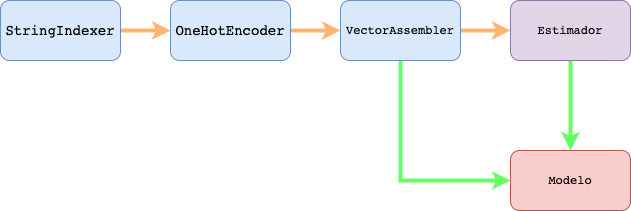



> *Figura 1. Ejemplo de un esquema de pipelines en Apache Spark.*

Una vez preprocesados los datos, podemos partirlos en dos conjuntos de entrenamiento y test para aplicar un algoritmo de Machine Learning así generar nuestro modelo de inferencia.

In [5]:
train, test = data.select('atributos','hospital_death').randomSplit([0.7, 0.3], seed = 2020)
print("DataFrame Entrenamiento: " + str(train.count())+" instancias.")
print("DataFrame Test: " + str(test.count())+" instancias.")

DataFrame Entrenamiento: 88690 instancias.
DataFrame Test: 37810 instancias.


**NOTA**: es preferible usar lo que se viene a denominar como validación cruzada, en lugar de usar entrenamiento y test. La validación cruzada o cross-validation es una técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y test. Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones. Se utiliza en entornos donde el objetivo principal es la predicción y se quiere estimar la precisión de un modelo que se llevará a cabo a la práctica. Es una técnica muy utilizada en proyectos de inteligencia artificial para validar modelos generados.

No obstante, en Big Data, no siempre podemos asumir el coste computacional de la validación cruzada y tendremos que usar dos conjuntos disjuntos de entrenamiento y test, que aunque tiene menos rigor estadístico, es mucho menos costosa.

##**4. PIPELINES CON MACHINE LEARNING.**

Tal y como hemos podido ver hasta el momento, hemos incluido todo el preprocesamiento de nuestro conjunto de datos en un pipeline. Ahora vamos a aprender cómo se puede añadir también un algoritmo de Machine Learning para generar nuestro modelo de inferencia.

Continuaremos con un ejemplo, específicamente de aprendizaje supervisado,  donde entrenaremos un clasificador de regresión logística a partir de los datos generados anteriormente gracias a nuestro pipeline.

Siguiendo la terminología de Spark entrenaremos un modelo Transformador (que posee el método `transform()`) mediante un Estimador de regresión logística (que posee el método `fit()`). Es decir, pondremos a prueba un Estimador con los datos de entrenamiento y, el modelo entrenado lo usaremos como un Transformador sobre los datos de test. Dicho Transformador tomará los datos de test y los convertirá en una serie de predicciones. Dichas predicciones las usaremos para calcular la precisión del modelo y testearemos su capacidad de inferencia.




In [6]:
from pyspark.ml.classification import LogisticRegression
#Aprendemos el Modelo de Regresión Logística
lr = LogisticRegression(featuresCol = 'atributos', labelCol = 'hospital_death', maxIter=10)
lrModel = lr.fit(train)

#Obtenemos las predicciones sobre el conjunto de test
predicciones = lrModel.transform(test)

#Ya podemos mostrar la precisión del modelo
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluador = MulticlassClassificationEvaluator(labelCol="hospital_death", metricName="accuracy")
print('Accuracy:', evaluador.evaluate(predicciones))

Accuracy: 0.950251256281407


Hemos alcanzado una precisión bastante alta para el modelo. Aún así lo podemos mejorar, aunque sea ligeramente. Ahora lo que haremos será añadir al pipeline el modelo de regresión logística, así conseguimos que Spark optimice más aún el proceso. En primer lugar desglosaremos los datos en entrenamiento y test. Definiremos el pipeline y entrenaremos el modelo. Dicho modelo, con el preprocesado de datos y el clasificador, se aplicará al conjunto de test para hacer las predicciones y así poder obtener la proporción de los datos que fueron clasificados correctamente.

In [7]:
#Partimos los datos (sin preprocesar)
train, test = df.randomSplit([0.7, 0.3], seed = 2020)

# Metemos en un array los nombres de columnas con datos categóricos
categoricalCols = ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']

# El resto de columnas tienen datos numéricos, por lo tanto, no hay que pasarles el StringIndexer
continuousCols = [i for i in dfX.columns if i not in categoricalCols]

# Generamos nuestro array de indexers, los cuales formarán parte del pipeline
indexers = [ StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c), handleInvalid="skip")
                 for c in categoricalCols ]

# Hacemos one-hot encoding con las columnas categorizadas previamente (mejora la eficiencia en la ejecución de Spark)
encoders = [ OneHotEncoder(inputCol=indexer.getOutputCol(),
              outputCol="{0}_encoded".format(indexer.getOutputCol()))
              for indexer in indexers ]

# Por último usamos el assembler para unir datos de entrada en una columna (atributos) y la salida en otra columna distinta (hospital_death)
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders]
                            + continuousCols, outputCol="atributos", handleInvalid="skip")

#Incorporamos el modelo de regresión logística
lr = LogisticRegression(featuresCol = 'atributos', labelCol = 'hospital_death', maxIter=10)

modeloRL = Pipeline(stages=indexers + encoders + [assembler] + [lr])

#Construimos el modelo: preprocesamiento + regresión logística
clasificador = modeloRL.fit(train)

#Obtenemos las predicciones sobre el conjunto de test
predicciones = clasificador.transform(test)

#Ya podemos mostrar la precisión del modelo
evaluator = MulticlassClassificationEvaluator(labelCol="hospital_death", metricName="accuracy")
print('Accuracy:', evaluator.evaluate(predicciones))

Accuracy: 0.948800084020375


A continuación vamos a ver las métricas y modelos de validación que podemos usar en Spark, en concreto, en aprendizaje supervisado.

##**5. MÉTRICAS PARA LA EVALUACIÓN DE LOS MODELOS DE APRENDIZAJE SUPERVISADO.**

Respecto de las herramientas existentes para aprendizaje supervisado en ML, tenemos clasificadores y regresores, lo cual depende de si la variable que queremos predecir es discreta o continua, respectivamente.

En los clasificadores, distinguiremos aquellos que son para clasificación binaria, es decir, la variable de salida sólo tiene dos estados, de la clasificación multiclase, es decir, aquellos en los que la variable de salida tiene más de dos estados.

Tengamos en cuenta, que los clasificadores que nos permiten trabajar con problemas multiclase también nos permiten trabajar con problemas binarios. Lo cual tiene sentido, es decir,  si un algoritmo es capaz de discriminar entre 4 ó 10 valores de la variable de salida, también debería ser capaz de distinguir entre dos.

En cualquier caso, también podemos usar clasificadores binarios en problemas multiclase, por ejemplo, utilizando la metodología Uno-contra-todos.  Este esquema construye un clasificador base para cada valor de la variable de salida y dicho clasificador distingue el valor i-ésimo del resto. 

A la hora de evaluar los algoritmos de aprendizaje supervisado, se han visto distintas métricas en capítulos anteriores del curso. Veamos como obtenerlas con Spark.

Primero, nos vamos a centrar en el caso de los problemas de clasificación binaria. En estos clasificadores vamos a usar la clase `BinaryClassificationEvaluator` que nos permite 
calcular la medida `areaUnderROC` que es el área bajo la curva ROC.
<!--calcular dos medidas:


1.   `areaUnderROC` : El área bajo la curva ROC, o también ROC AUC. Se ha visto ya previamente. 
2.   `areaUnderPR`: Es el área bajo la curva  Precision-Recall, o también Precision-Recall AUC. La curva PR es el resultado de dibujar la gráfica entre el precision y el recall. Esta gráfica nos permite ver a partir de qué recall tenemos una degradación de la precisión y viceversa. Lo ideal sería una curva que se acerque lo máximo posible a la esquina superior derecha (alta precisión y alto recall). Esta métrica es más apropiada para conjuntos no balanceados, es decir, hay un reparto desigual acusado entre las dos clases del problema.

Vamos a usar el ejemplo anterior para mostrar ambas métricas:

-->
<!-- #La regresión logística, también nos permite mostras la curvas ROC
import matplotlib.pyplot as plt
trainingSummary = clasificador.stages[-1].summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'].tolist(),roc['TPR'].tolist(),color='orange')
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.show()
-->

In [8]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

#Ya podemos mostrar la bondad de las predicciones del modelo
evaluator = BinaryClassificationEvaluator(labelCol="hospital_death", metricName="areaUnderROC")
print('ROC AUC:', evaluator.evaluate(predicciones))

ROC AUC: 0.4542422145967087


Ahora nos centramos en el caso de la clasificación multiclase. Es importante señalar que las métricas que usan cuando hay más de una clase se pueden utilizar igualmente en clasificación binaria.  En este caso vamos a usar la clase `MulticlassClassificationEvaluator` y las medidas que podemos obtener son:
*  `accuracy`: También llamado proporción de bien clasificados. Se refiere a la ratio de ejemplos positivos correctamente identificados con respecto al total. 
*  `weightedPrecision`: Es la precisión promediada por etiqueta, es decir, se calcula la media de la precisión por cada etiqueta.
*  `weightedRecall`: Es el *Recall* promediado por etiqueta, es decir, se calcula la media de la precisión por cada etiqueta.
*  `f1`: También denominado *F-measure*, es la métrica que combina *precision* y  *recall*.

Sigamos con el ejemplo anterior que, aún siendo un problema de clasificación binario, podemos calcular estas medidas:


In [9]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Ya podemos mostrar la bondad de las predicciones del modelo multiclase
evaluator = MulticlassClassificationEvaluator(labelCol="hospital_death")
print('F1:', evaluator.evaluate(predicciones))
print('Accuracy:', evaluator.evaluate(predicciones, {evaluator.metricName: "accuracy"}))
print('Weighted Precision:', evaluator.evaluate(predicciones, {evaluator.metricName: "weightedPrecision"}))
print('Weighted Recall:', evaluator.evaluate(predicciones, {evaluator.metricName: "weightedRecall"}))

F1: 0.9238727017908509
Accuracy: 0.948800084020375
Weighted Precision: 0.9002215994370705
Weighted Recall: 0.948800084020375




En el caso de que la variable a predecir sea una variable continua, se dice que el modelo Machine Learning es un regresor. Para el caso de la regresión vamos a usar la clase `RegressionEvaluator` y las medidas que podemos obtener son:
<!--* `mse`: Error cuadrático medio. Mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores.-->
* `rmse`:  Es la raíz cuadrada del error cuadrático medio. La raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.

* `r2`:  El coeficiente de determinación, o $r^2$, está estrechamente relacionada con el error cuadrático medio, pero siempre estará entre -∞ y 1.
<!--* `mae`: Error absoluto medio. El error se calcula como un promedio de diferencias absolutas entre los valores objetivo y las predicciones. De esta forma, todas las diferencias individuales se ponderan por igual en el promedio.-->


Sigamos con el ejemplo anterior, pero al SER un problema de clasificación binario, no van a tener mucho sentido los resultados. Sólo nos sirve para comprender cómo se usa:
<!-- from pyspark.ml.evaluation import RegressionEvaluator

#Ya podemos mostrar la bondad de las predicciones del modelo multiclase
evaluator = RegressionEvaluator(labelCol="clase")
print('rmse:', evaluator.evaluate(predicciones))
print('mse:', evaluator.evaluate(predicciones, {evaluator.metricName: "mse"}))
print('r2:', evaluator.evaluate(predicciones, {evaluator.metricName: "r2"}))
print('mae:', evaluator.evaluate(predicciones, {evaluator.metricName: "mae"}))-->



In [10]:
from pyspark.ml.evaluation import RegressionEvaluator

#Ya podemos mostrar la bondad de las predicciones del modelo multiclase
evaluator = RegressionEvaluator(labelCol="hospital_death")
print('rmse:', evaluator.evaluate(predicciones))
print('r2:', evaluator.evaluate(predicciones, {evaluator.metricName: "r2"}))


rmse: 0.22627398431906628
r2: -0.05396280717290214


##**6. VALIDACIÓN DE LOS MODELOS DE APRENDIZAJE SUPERVISADO.**

Hasta este punto, hemos validado nuestro modelo de ejemplo con diversas métricas, pero usando un sólo método: Entrenamiento y Test. Aunque hemos sido nosotros, con nuestro código, quiénes se han encargado de partir los datos, entrenar el modelo con el conjunto de entrenamiento y probarlo con el de test, se puede automatizar este proceso. Podemos usar la clase `TrainValidationSplit`, indicándole el modelo del clasificador, un objeto `ParamGrimBuilder` que se usa en otras funcionalidades que no veremos, la clase que se encarga de la evaluación y finalmente la proporción de la partición. 


In [11]:
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder

#Creamos una clase Evaluador
evaluador = MulticlassClassificationEvaluator(labelCol="hospital_death", metricName="accuracy")

#Usamos la regresión logística para ser evaluada 
validadorTT= TrainValidationSplit(estimator=modeloRL,
                           estimatorParamMaps=ParamGridBuilder().build(),
                           evaluator=evaluador,
                           trainRatio=0.8) # 80% de los datos para entrenamiento
validadorTT.setSeed(2020)
#Entrenamos el modelo con el conjunto completo de datos
modeloTT=validadorTT.fit(df)

#Mostramos la precisión del modelo
print(modeloTT.getEvaluator().getMetricName(), ':',modeloTT.validationMetrics[0] )

accuracy : 0.9476815675697117



Este tipo de validación es bastante sencillo y rápido, aunque como vimos, tiene poco rigor estadístico y los resultados dependen demasiado de cómo hagamos la partición de los datos. Al ser una validación tan sesgada, es preferible hacer una validación cruzada de, al menos, unas 10 particiones. No obstante, en Big Data, como hemos dicho, no siempre podremos permitirnos el lujo de escoger una validación tan costosa.

Para esta validación podemos usar la clase `CrossValidator`, y donde antes indicábamos el porcentaje de datos para entrenamiento, ahora indicaremos el número de particiones. 

In [ ]:
from pyspark.ml.tuning import CrossValidator

#Validación cruzada
crossval = CrossValidator(estimator=modeloRL,
                          estimatorParamMaps=ParamGridBuilder().build(),
                          evaluator=evaluador,
                          numFolds=10) 
#Entrenamos el modelo
cvModel=crossval.fit(df)

#Ya podemos mostrar la precisión del modelo
print(cvModel.getEvaluator().getMetricName(), ':',cvModel.avgMetrics[0])




FIN DEL CUADERNO ACTUAL

---



---

